
# 1. Setup



In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("spotify_data/dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# 2. Data Cleaning


*   Todo 1
*   Todo 2



In [5]:
#spotify_original_reshape.head(20)
#spotify_original.shape
spotify_original_reshape




,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
spotify_original_reshape['track_name'].describe()

count              113999
unique              73608
top       Run Rudolph Run
freq                  151
Name: track_name, dtype: object

In [7]:
spotify_original_reshape['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [8]:
spotify_original_reshape['track_genre'].describe()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object

In [9]:
missing_track = spotify_original_reshape[spotify_original_reshape['track_id'] == '1kR4gIb7nGxHPI3D2ifs59']
print(missing_track)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


In [10]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

(114000, 20)
(113999, 20)


In [11]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final


Shape of the dataset before cleaning: (113999, 23)
Shape of the dataset after cleaning: (81206, 23)
Shape of the dataset after removing extra columns: (81206, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


# 3. Exploratory Data Analysis




<Axes: >

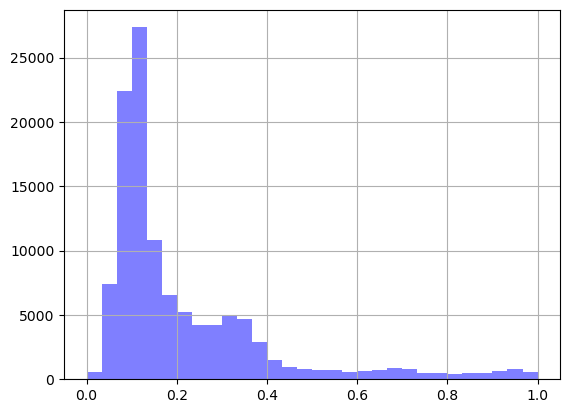

In [12]:
"""
Histograms
"""
spotify_original_reshape['liveness'].hist(bins = 30, alpha = 0.5, color='blue')

Text(0.5, 1.0, 'Danceability vs Popularity')

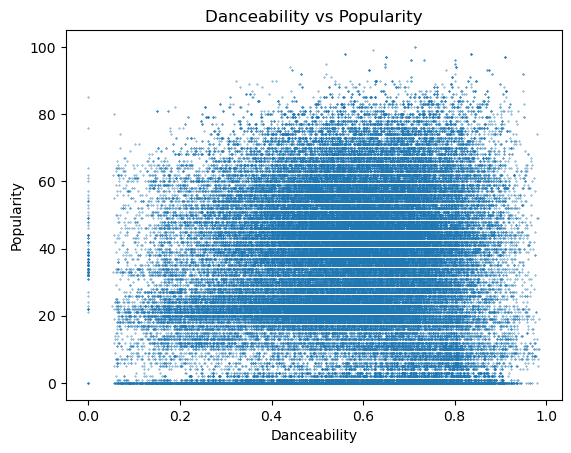

In [13]:
"""
Visualizing correlation between dancebility and popularity features
"""

plt.scatter(spotify_original_reshape['danceability'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')

Text(0.5, 1.0, 'Energy vs Popularity')

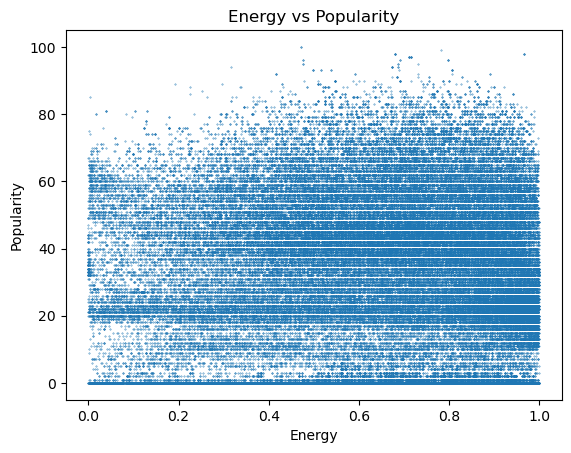

In [14]:
"""
Visualizing correlation between energy and popularity
"""

plt.scatter(spotify_original_reshape['energy'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity')

In [15]:
"""
Visualizing the Correlation Between Popularity and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Popularity Correlation:', np.corrcoef(spotify_original_reshape['popularity'], spotify_original_reshape[features])[0,1])


popularity vs. Popularity Correlation: 1.0
duration_ms vs. Popularity Correlation: -0.007101208619704766
danceability vs. Popularity Correlation: 0.03544813475138599
energy vs. Popularity Correlation: 0.001056136299698507
key vs. Popularity Correlation: -0.003853154715560715
loudness vs. Popularity Correlation: 0.050423036100497774
mode vs. Popularity Correlation: -0.013930786753107906
speechiness vs. Popularity Correlation: -0.04492654926158635
acousticness vs. Popularity Correlation: -0.02547241256836337
instrumentalness vs. Popularity Correlation: -0.09513920344466423
liveness vs. Popularity Correlation: -0.005387153831593012
valence vs. Popularity Correlation: -0.040534294659946325
tempo vs. Popularity Correlation: 0.013204659932994902
time_signature vs. Popularity Correlation: 0.031072758760108017


In [16]:
"""
Visualizing the Correlation Between Tempo and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Tempo Correlation:', np.corrcoef(spotify_original_reshape['tempo'], spotify_original_reshape[features])[0,1])


popularity vs. Tempo Correlation: 0.013204659932994902
duration_ms vs. Tempo Correlation: 0.024345605690600364
danceability vs. Tempo Correlation: -0.050449871431220004
energy vs. Tempo Correlation: 0.2478505098026229
key vs. Tempo Correlation: 0.01091661911281033
loudness vs. Tempo Correlation: 0.2124458965795149
mode vs. Tempo Correlation: 0.000565558105794505
speechiness vs. Tempo Correlation: 0.01727322333048465
acousticness vs. Tempo Correlation: -0.20822414719631285
instrumentalness vs. Tempo Correlation: -0.05033040132787468
liveness vs. Tempo Correlation: 0.0005997673113031102
valence vs. Tempo Correlation: 0.07827306763947273
tempo vs. Tempo Correlation: 0.9999999999999999
time_signature vs. Tempo Correlation: 0.06664108820639164


In [ ]:
"""
Correlation matrix and Heatmap
"""

numeric_data = spotify_cleaned_final.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

danceability_correlation = correlation_matrix["danceability"].sort_values(ascending=False)

print(danceability_correlation)

import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Spotify Dataset')
plt.show()

danceability        1.000000
valence             0.492137
loudness            0.265067
time_signature      0.207024
energy              0.134576
speechiness         0.108483
popularity          0.084179
key                 0.032563
tempo              -0.015294
mode               -0.059259
duration_ms        -0.060047
liveness           -0.132165
acousticness       -0.167830
instrumentalness   -0.191710
Name: danceability, dtype: float64


# 4. Regression

## 4a. Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

ls_tempo_danceability_fit = LinearRegression()
ls_tempo_danceability_fit.fit(X=np.array(spotify_original_reshape_drop['tempo']).reshape(-1, 1),
                          y=spotify_original_reshape_drop['danceability'])

In [ ]:
fig = px.scatter(spotify_original_reshape_drop, x='tempo', y='danceability')
fig.add_trace(
    go.Scatter(x=spotify_original_reshape_drop['tempo'],
                y=ls_tempo_danceability_fit.intercept_ + spotify_original_reshape_drop['tempo'] * ls_tempo_danceability_fit.coef_[0],
                mode='lines',
                name='LS',
                line={'dash': 'solid',
                      'color': 'black'})
)

In [ ]:
pred_train_df = pd.DataFrame(
    {'true': spotify_original_reshape_drop['danceability'],
     'ls_pred': ls_tempo_danceability_fit.predict(np.array(spotify_original_reshape_drop['tempo']).reshape(-1, 1))})
pred_train_df

In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

In [ ]:
ls_loudness_energy_fit = LinearRegression()
ls_loudness_energy_fit.fit(X=np.array(spotify_original_reshape_drop['loudness']).reshape(-1, 1),
                          y=spotify_original_reshape_drop['energy'])

fig = px.scatter(spotify_original_reshape_drop, x='loudness', y='energy')
fig.add_trace(
    go.Scatter(x=spotify_original_reshape_drop['loudness'],
                y=ls_loudness_energy_fit.intercept_ + spotify_original_reshape_drop['loudness'] * ls_loudness_energy_fit.coef_[0],
                mode='lines',
                name='LS',
                line={'dash': 'solid',
                      'color': 'black'})
)

In [ ]:
pred_train_df = pd.DataFrame(
    {'true': spotify_original_reshape_drop['energy'],
     'ls_pred': ls_loudness_energy_fit.predict(np.array(spotify_original_reshape_drop['loudness']).reshape(-1, 1))})
pred_train_df

In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

## 4b. Polynomial Regression

In [ ]:
"""
Polynomial Regression with y = Energy; x = Loudness and degree = 1
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Lasso


X_loudness = spotify_cleaned_final.select_dtypes(include=['float64', 'int64']).drop(columns=['energy'])
y_energy = spotify_cleaned_final['energy']


X_train_val, X_test, y_train_val, y_test = train_test_split(X_loudness, y_energy, test_size=1/3, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=35)

# polynomial transformation to the features (degree=1)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# train the linear regression model using the transformed polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

print("Coefficients (Theta):", model.coef_)

print("Columns", X_loudness.columns)

# evaluate on validation set
y_pred_val = model.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Mean Squared Error (Validation Data): {mse_val}")
print(f"R-squared (Validation Data): {r2_val}")

# once validated, evaluate on the test set (unseen data)
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R-squared (Test Data): {r2_test}")

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

import matplotlib.pyplot as plt

# Calculate residuals for the test set
residuals = y_test - y_pred_test

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Energy')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [ ]:
"""
Polynomial Regression with y = Energy; x = Loudness and degree=2
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_loudness = numeric_data[['loudness']]
y_energy = numeric_data['energy']



X_train_val, X_test, y_train_val, y_test = train_test_split(X_loudness, y_energy, test_size=1/3, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=35)

# polynomial transformation to the features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# train the linear regression model using the transformed polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# evaluate on validation set
y_pred_val = model.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Mean Squared Error (Validation Data): {mse_val}")
print(f"R-squared (Validation Data): {r2_val}")

# once validated, evaluate on the test set (unseen data)
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R-squared (Test Data): {r2_test}")

# plot the validation data points and regression line
plt.scatter(X_val, y_val, color='green', label='Validation Data points', s=10, alpha=0.3)
sorted_idx = np.argsort(X_val.values.flatten())
plt.plot(X_val.values[sorted_idx], y_pred_val[sorted_idx], color='orange', linewidth=2, label='Polynomial regression line (Validation)')

plt.xticks(np.arange(min(X_val.values), max(X_val.values)+1, 2), rotation=45, fontsize=10)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel('Loudness')
plt.ylabel('Energy (scale 0-1)')
plt.title('Energy vs Loudness with Polynomial Regression Line (Validation Data)')
plt.legend()
plt.grid(True)
plt.show()

# plot the test data points and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data points', s=10, alpha=0.3)
sorted_idx = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_idx], y_pred_test[sorted_idx], color='red', linewidth=2, label='Polynomial regression line (Test)')

plt.xticks(np.arange(min(X_test.values), max(X_test.values)+1, 2), rotation=45, fontsize=10)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel('Loudness')
plt.ylabel('Energy (scale 0-1)')
plt.title('Energy vs Loudness with Polynomial Regression Line (Test Data)')
plt.legend()
plt.grid(True)
plt.show()

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


## 4c. Regularization

In [ ]:
"""
Polynomial Regression with Regularization using Lasso Regression
"""

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Polynomial transformation (you've already done this)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 2: Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=0.005)  # You can tune the alpha value
lasso_model.fit(X_train_poly, y_train)

# Step 3: Predict on validation and test sets
y_pred_val_lasso = lasso_model.predict(X_val_poly)
y_pred_test_lasso = lasso_model.predict(X_test_poly)

# Step 4: Evaluate the model performance
mse_val_lasso = mean_squared_error(y_val, y_pred_val_lasso)
r2_val_lasso = r2_score(y_val, y_pred_val_lasso)
print(f"Lasso - Mean Squared Error (Validation Data): {mse_val_lasso}")
print(f"Lasso - R-squared (Validation Data): {r2_val_lasso}")

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f"Lasso - Mean Squared Error (Test Data): {mse_test_lasso}")
print(f"Lasso - R-squared (Test Data): {r2_test_lasso}")

# Step 5: Analyze residuals for Lasso model
residuals_lasso = y_test - y_pred_test_lasso

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_lasso, residuals_lasso, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Energy (Lasso)')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Lasso Regression')
plt.grid(True)
plt.show()


In [ ]:
"""
Polynomial Regression with multiple features; Regularization (Ridge)
"""

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select additional features along with loudness
X_features = numeric_data[['loudness', 'tempo', 'valence', 'danceability']]  # Add relevant features
y_energy = numeric_data['energy']

# Step 2: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_features, y_energy, test_size=1/3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Step 3: Apply polynomial transformation (degree=2 or 3) on multiple features
poly = PolynomialFeatures(degree=2)  # You can change to degree 3 if needed
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 4: Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train_poly, y_train)

# Step 5: Predict on validation and test sets
y_pred_val_ridge = ridge_model.predict(X_val_poly)
y_pred_test_ridge = ridge_model.predict(X_test_poly)

# Step 6: Evaluate the model performance
mse_val_ridge = mean_squared_error(y_val, y_pred_val_ridge)
r2_val_ridge = r2_score(y_val, y_pred_val_ridge)
print(f"Ridge - Mean Squared Error (Validation Data): {mse_val_ridge}")
print(f"Ridge - R-squared (Validation Data): {r2_val_ridge}")

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f"Ridge - Mean Squared Error (Test Data): {mse_test_ridge}")
print(f"Ridge - R-squared (Test Data): {r2_test_ridge}")

# Step 7: Plot the residuals for Ridge regression on the test set
residuals_ridge = y_test - y_pred_test_ridge
plt.scatter(X_test['loudness'], residuals_ridge)  # Scatter plot against loudness
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Loudness')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Ridge Regression with Additional Features')
plt.show()


# 5. Logistic Regression
  * Here, we will try to use logistic regression to predict the mode of a song.
  * From the database: mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0


In [ ]:
"""
Import the necessary libraries
"""
from sklearn.linear_model import LogisticRegression


In [ ]:
"""
Preprocessing of the data by dropping all non-numeric columns
"""

spotify_cleaned_final_numeric = spotify_cleaned_final.select_dtypes(include=[np.number])


In [ ]:
"""
Split the data into training and testing sets
"""

X = spotify_cleaned_final_numeric.drop(columns=['mode', 'time_signature', 'speechiness', 'liveness', 'popularity', 'duration_ms', 'loudness'])
y = spotify_cleaned_final_numeric['mode']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train columns:", X_train.columns)
print("X_val columns:", X_val.columns)

In [ ]:
"""
Fit the logistic regression model
"""

lr_all = LogisticRegression(solver='liblinear')
lr_all.fit(X_train, y_train)
lr_all.intercept_, lr_all.coef_

In [ ]:
"""
Evaluate binary prediction on validation set
"""
lr_all.predict(X_val)
pred_val_sample = pd.DataFrame({'actual': y_val, 'predicted': lr_all.predict(X_val)})
count_misclassified = np.sum(pred_val_sample['actual'] != pred_val_sample['predicted'])
print('Total samples:', len(y_val))
print('Misclassified samples:', count_misclassified)
print('Accuracy:', (len(y_val) - count_misclassified) / len(y_val))

In [ ]:
"""
Confusion matrix
"""

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, lr_all.predict(X_val))
conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
conf_matrix

In [ ]:
"""
Prediction accuracy
"""

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_val, lr_all.predict(X_val)))

In [ ]:
"""
True positive rate
"""

print('True Positive Rate:', conf_matrix['Predicted 1']['Actual 1'] / (conf_matrix['Predicted 1']['Actual 1'] + conf_matrix['Predicted 0']['Actual 1']))

In [ ]:
"""
True negative rate
"""

print('True Negative Rate:', conf_matrix['Predicted 0']['Actual 0'] / (conf_matrix['Predicted 0']['Actual 0'] + conf_matrix['Predicted 1']['Actual 0']))

In [ ]:
"""
ROC curve 
"""

from sklearn.metrics import roc_curve

# lr_all.predict_proba(X_val) will return the probabilities of the negative and positive classes respectively
# We are interested in the positive class so we slice the second column
positive_class_prob = lr_all.predict_proba(X_val)[:, 1]

# Compute the ROC curve variables
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, positive_class_prob)

# Create a DataFrame to store the ROC curve variables, 
# which 'False Positive Rate' and 'True Positive Rate' and 'Model' as columns 
# and the thresholds as the index
roc_lr_sample = pd.DataFrame({
    'False Positive Rate': false_positive_rate,
    'True Positive Rate': true_positive_rate,
    'Model': 'Logistic Regression'
}, index=thresholds)

roc_sample_df = pd.concat([roc_lr_sample])

px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

In [ ]:
"""
AUC score
"""

from sklearn.metrics import roc_auc_score

lr_auc_score = roc_auc_score(y_val, positive_class_prob)
print('AUC Score:', lr_auc_score)

In [ ]:
"""
Implementing 5-Fold Cross Validation
"""
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

# Creating a list to store cross-validation scores
log_cv_scores = []
log_reg = LogisticRegression(solver='liblinear')

X = spotify_cleaned_final_numeric.drop(columns=['mode', 'time_signature', 'speechiness', 'liveness', 'popularity', 'duration_ms'])
y = spotify_cleaned_final_numeric['mode']

log_cv_scores = cross_validate(estimator=log_reg,
                              X=X,
                              y=y,
                              cv=5,
                              scoring='neg_root_mean_squared_error')

log_cv_scores['test_score']


# PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

spotify_cleaned_final.shape

numeric_columns = spotify_cleaned_final.select_dtypes(include=[np.number]).columns
non_numeric_columns = spotify_cleaned_final.select_dtypes(exclude=[np.number]).columns

print(f"Numeric columns ({len(numeric_columns)}): {numeric_columns.tolist()}")
print(f"Non-numeric columns ({len(non_numeric_columns)}): {non_numeric_columns.tolist()}")



In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_data = spotify_cleaned_final.select_dtypes(include=[np.number])

scaler = StandardScaler()
data_standardized = scaler.fit_transform(numeric_data)


In [ ]:
pca = PCA(n_components=None) 
pca.fit(data_standardized)

data_pca = pca.transform(data_standardized)



In [ ]:
# Perform SVD on the standardized dataset
pca_U, pca_d, pca_V = np.linalg.svd(data_standardized, full_matrices=False)

explained_variance = (pca_d ** 2) / (len(data_standardized) - 1)

total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance

print("Explained Variance Ratio:", explained_variance_ratio)
print(pca_d)




In [ ]:
prop_var = np.square(pca_d) / sum(np.square(pca_d))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(14)

In [ ]:
loadings1 = pd.DataFrame(
    {
        "features": spotify_cleaned_final_numeric.columns, 
        "pc1_loading": pca_V[0] 
    }
)

loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)


In [ ]:
loadings2 = pd.DataFrame(
    {"features": spotify_cleaned_final_numeric.columns,
     "pc2_loading": pca_V[1]
     })
# look at the 10 largest (absolute value) loadings for PC2 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

In [ ]:
import pandas as pd

pca_scaled_x = data_standardized @ pca_V.T

pca_scaled_x = pd.DataFrame(pca_scaled_x)

pca_scaled_x.columns = ["PC" + str(1 + col) for col in range(pca_scaled_x.shape[1])]

pca_scaled_x.index = spotify_cleaned_final['track_name'] 

pca_scaled_x.head()


In [ ]:
import matplotlib.pyplot as plt

# Plotting PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_scaled_x['PC1'], pca_scaled_x['PC2'], alpha=0.7)


plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: PC1 vs PC2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_scaled_x['PC1'], pca_scaled_x['PC2'], c=spotify_cleaned_final_numeric['energy'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Energy')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: PC1 vs PC2 (Colored by Energy)')
plt.show()


In [ ]:
pca_prop_explained = np.square(pca_d) / sum(np.square(pca_d))

# Create a line plot showing the proportion of variance explained by each principal component
fig = px.line(
    x=np.arange(1, pca_prop_explained.shape[0] + 1),  # PC indices start at 1
    y=pca_prop_explained,
    labels={"x": "Principal Component (PC)", "y": "Proportion of Variance Explained"},
    title="Proportion of Variance Explained by Each Principal Component"
)

# Display the plot
fig.show()

In [ ]:
import numpy as np
import plotly.express as px

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_prop_explained)

# Create a line plot showing the cumulative variance explained by each component
fig = px.line(
    x=np.arange(1, cumulative_variance.shape[0] + 1),
    y=cumulative_variance,
    labels={"x": "Principal Component (PC)", "y": "Cumulative Variance Explained"},
    title="Cumulative Variance Explained by Principal Components"
)

fig.show()



In [ ]:
reduced_data = data_standardized @ pca_V[:7].T
reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(7)])

reduced_data_df.index = spotify_cleaned_final['track_name']
reduced_data_df.head()

In [ ]:
import plotly.express as px

# Scatter plot of PC1 vs PC2
fig = px.scatter(
    reduced_data_df,
    x='PC1',
    y='PC2',
    hover_name=reduced_data_df.index,
    title="PCA Scatter Plot: PC1 vs PC2"
)
fig.show()


Explanations: 

1. For this project check-in your team must demonstrate at least one unsupervised learning method: PCA or clustering. You may even combine them.

    *We chose to apply PCA to our dataset.*

2. If you apply PCA to your data, include code, cumulative variability explained, and scree plot. Explain how you are using PCA in your project for dimensionality reduction or to learn structure in the data.

    *We used PCA to reduce the dataset from 14 features to 7 principal components. We projected the data to the first 7 PC, and we determined which PC were the most influential using the scree plot and the cumulative variance plot*

3. If you apply clustering, include code. quantitative metrics to evaluate clustering, and how you determined the number of clusters for your data and why. Explain how clustering helped you learn about the structure of data for your project.

    *N/A*
